In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Regularized Linear Regression

In [5]:
data_train = np.loadtxt('features.train')
data_test = np.loadtxt('features.test')

In [6]:
data_train.shape, data_test.shape

((7291, 3), (2007, 3))

In [17]:
class MyLinearRegression:
    
    def __init__(self, lam=1.0):
        self.lambda_ = lam
        
    def fit(self, X, y):
        term1 = np.dot(X.T, X) + self.lambda_*np.eye(N=X.shape[1])
        term2 = np.dot(X.T, y)
        self.w_ = np.dot(np.linalg.pinv(term1), term2)
        return self
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w_))
    
    def score(self, X, y_true):
        y_pred = self.predict(X)
        return (y_pred != y_true).mean()

In [25]:
def make_y_vs_all(y, num):
    return np.where(y==num, 1, -1)

def z_transform(X):
    assert X.shape[1]==3
    x0, x1, x2 = X.T
    return np.c_[x0, x1, x2, x1*x2, x1**2, x2**2]

In [14]:
y_train = data_train[:, 0]
X_train = np.c_[np.ones(len(data_train)), data_train[:, 1:]]
X_test = np.c_[np.ones(len(data_test)), data_test[:, 1:]]
y_test = data_test[:, 0]

In [15]:
X_train.shape, X_test.shape

((7291, 3), (2007, 3))

In [22]:
for n in range(5, 10):
    clf = MyLinearRegression(lam=1.0).fit(X_train, make_y_vs_all(y_train, n))
    s = clf.score(X_train, make_y_vs_all(y_train, n))
    print("{} versus all: E_in = {:.5f}".format(n, s))

5 versus all: E_in = 0.07626
6 versus all: E_in = 0.09107
7 versus all: E_in = 0.08847
8 versus all: E_in = 0.07434
9 versus all: E_in = 0.08833


In [27]:
for n in range(0, 5):
    Z_in = z_transform(X_train)
    y_in = make_y_vs_all(y_train, n)
    Z_out = z_transform(X_test)
    y_out = make_y_vs_all(y_test, n)
    clf = MyLinearRegression(lam=1.0).fit(Z_in, y_in)
    score = clf.score(Z_out, y_out)
    print("{} versus all: E_out = {:.5f}".format(n, score))

0 versus all: E_out = 0.10663
1 versus all: E_out = 0.02192
2 versus all: E_out = 0.09865
3 versus all: E_out = 0.08271
4 versus all: E_out = 0.09965


In [34]:
E_out_transform = []
E_in_transform = []
E_out_original = []
E_in_original = []

for n in range(0, 10):
    y_in = make_y_vs_all(y_train, n)
    y_out = make_y_vs_all(y_test, n)
    Z_in = z_transform(X_train)
    Z_out = z_transform(X_test)
    
    clf_x = MyLinearRegression(lam=1.0).fit(X_train, y_in)
    clf_z = MyLinearRegression(lam=1.0).fit(Z_in, y_in)
    
    E_out_original.append(clf_x.score(X_test, y_out))
    E_in_original.append(clf_x.score(X_train, y_in))
    E_out_transform.append(clf_z.score(Z_out, y_out))
    E_in_transform.append(clf_z.score(Z_in, y_in))
    
data = {'E_in[Z]': E_in_transform,
        'E_out[Z]': E_out_transform,
        'E_in[X]': E_in_original,
        'E_out[X]': E_out_original}

df = pd.DataFrame(data) #, columns=['E_in[X]', 'E_out[X]', 'E_in[Z]', 'E_out[Z]'])

In [35]:
df

,E_in[X],E_in[Z],E_out[X],E_out[Z]
0,0.109313,0.102318,0.115097,0.106627
1,0.015224,0.012344,0.022422,0.021923
2,0.100261,0.100261,0.098655,0.098655
3,0.090248,0.090248,0.082711,0.082711
4,0.089425,0.089425,0.099651,0.099651
5,0.076258,0.076258,0.079721,0.079223
6,0.091071,0.091071,0.084704,0.084704
7,0.088465,0.088465,0.073244,0.073244
8,0.074338,0.074338,0.082711,0.082711
9,0.088328,0.088328,0.088191,0.088191


In [37]:
(df['E_out[X]'] < df['E_out[Z]']).any()

False

In [39]:
df['E_out[Z]'] < 0.95*df['E_out[X]']

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [40]:
df['E_out[Z]'] < df['E_out[X]']

0     True
1     True
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [41]:
df['E_out[X]'] < 0.95*df['E_out[Z]']

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [42]:
df['E_out[Z]'] / df['E_out[X]']

0    0.926407
1    0.977778
2    1.000000
3    1.000000
4    1.000000
5    0.993750
6    1.000000
7    1.000000
8    1.000000
9    1.000000
dtype: float64

In [48]:
one_or_five_train = (y_train == 1) | (y_train == 5)
one_or_five_test = (y_test == 1) | (y_test == 5)

y15_train = y_train[one_or_five_train]
X15_train = X_train[one_or_five_train, :]
y15_test = y_test[one_or_five_test]
X15_test = X_test[one_or_five_test, :]


Z15_train = z_transform(X15_train)
Z15_test = z_transform(X15_test)

y_in = make_y_vs_all(y15_train, 1)
y_out = make_y_vs_all(y15_test, 1)

In [50]:
for lam in [0.01, 1.0]:
    clf = MyLinearRegression(lam=lam).fit(Z15_train, y_in)
    print("lamda={}".format(lam))
    print('E_in: {:.5f}, E_out: {:.5f}'.format(clf.score(Z15_train, y_in), clf.score(Z15_test, y_out)))

lamda=0.01
E_in: 0.00448, E_out: 0.02830
lamda=1.0
E_in: 0.00512, E_out: 0.02594


### Support Vector Machines

In [51]:
from sklearn.svm import SVC

In [151]:
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2.], [-2., 0]])
X

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0., -1.],
       [-1.,  0.],
       [ 0.,  2.],
       [ 0., -2.],
       [-2.,  0.]])

In [152]:
x1, x2 = X.T

Z = np.c_[x2**2 - 2*x1 -1, x1**2 - 2*x2 + 1]
Z

array([[-3.,  2.],
       [ 0., -1.],
       [ 0.,  3.],
       [ 1.,  2.],
       [ 3., -3.],
       [ 3.,  5.],
       [ 3.,  5.]])

In [153]:
y = np.array([-1., -1., -1., 1, 1, 1, 1])

In [73]:
w = [2, 0]
b = -1

y*(np.dot(Z, w) + b) /  np.linalg.norm(w)

array([ 3.5,  0.5,  0.5,  0.5,  2.5,  2.5,  2.5])

In [154]:
m = SVC(C=float('inf'), kernel='poly', degree=2, gamma=1, coef0=1)
m.fit(X, y)
print(m.n_support_.sum())

5


### Radial Basis Functions

In [41]:
def f(X):
    '''target function'''
    assert X.shape[1] == 2
    x1, x2 = X.T
    return np.sign(x2 - x1 + 0.25*np.sin(x1*np.pi))

In [42]:
class RBF_Model:
    
    def __init__(self, k, gamma):
        self.k = k
        self.gamma = gamma
        
    def fit(self, X, y):
        
        # get k cluster
        from sklearn.cluster import KMeans
        kmean = KMeans(n_clusters=self.k).fit(X)
        self.centroids_ = kmean.cluster_centers_
        
        # transfrom rbf
        Z = self._rbf_transfrom(X)
        
        # train linear regression
        w = np.dot(np.linalg.pinv(np.dot(Z.T, Z)), np.dot(Z.T, y))
        self.coef_ = w[1:]
        self.bias_ = w[0]
        self.w_ = w
        return self
    
    def predict(self, X):
        Z = self._rbf_transfrom(X)
        y_pred = np.dot(Z, self.w_)
        return np.sign(y_pred)
        
    def _rbf_transfrom(self, X):
        assert X.shape[1] == self.centroids_.shape[1]
        d = X[:, np.newaxis, :] - self.centroids_[np.newaxis, :, :]
        d = np.linalg.norm(d, axis=-1)**2
        return np.c_[np.ones(len(d)), np.exp(-self.gamma * d)]
    
    def score(self, X, y_true):
        '''error rate'''
        y_pred = self.predict(X)
        return (y_true != y_pred).mean()

In [21]:
from sklearn.metrics.pairwise import rbf_kernel

In [48]:
class MySVM:
    '''Hard margin SVM using dual solution'''
    def __init__(self, kernel='linear', gamma=1.0, tol=1e-5):
        self.w_ = None
        self.bias_ = None
        self.gamma = gamma
        self.tol = tol
        self.kernel = self._linear_kernel if kernel=='linear' else self._rbf_kernel
        
    def fit(self, X, y):
        from cvxopt import matrix, solvers
        solvers.options['show_progress'] = False
        
        n, d = X.shape
        
        Q = np.outer(y, y) * self.kernel(X, X)
        p = -np.ones(n)
        
        A = np.vstack((y, -y, np.eye(n)))
        h = np.zeros(n+2)
        
        result = solvers.qp(*map(matrix, [Q, p, -A, h]), show_progress=False)
        alpha = np.ravel(result['x'])
        
        # recover w & b
        self.support_ = alpha > self.tol
        self.alpha_ = alpha[self.support_]
        self.y_ = y[self.support_]
        self.support_vecs_ = X[self.support_, :]
        
        xs = X[self.support_, :][0]
        ys = y[self.support_][0]
        if self.kernel == self._linear_kernel:
            self.w_ = np.dot(self.alpha_*self.y_, self.support_vecs_)        
            assert len(self.w_) > 0, "{}, {}".format(self.w_, type(self.w_))   
            self.bias_ = ys - np.dot(self.w_, xs)
            
        else:
            self.bias_ = ys - np.dot(self.y_*self.alpha_, self.kernel(self.support_vecs_, xs[np.newaxis, :]))

        return self
    
    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)
    
    def _rbf_kernel(self, X1, X2):
        return rbf_kernel(X1, X2, gamma=self.gamma)
    
    def predict(self, X):
        if self.kernel == self._linear_kernel:
            return np.sign(np.dot(X, self.w_) + self.bias_)
        else:
            return np.sign(np.dot(self.y_*self.alpha_, 
                                  self.kernel(self.support_vecs_, X)) + self.bias_)

In [37]:
def test_svm_linear():
    X = np.array([[0, 0], [2.,2], [2, 0], [3, 0]])
    y = np.array([-1., -1, 1, 1])
    expected_w = np.array([1, -1.])
    expected_b = -1
    m = MySVM().fit(X, y)
    w = m.w_
    b = m.bias_
    assert np.allclose(w, expected_w), "{} != {} [expected]".format(w, expected_w)
    assert np.allclose(b, expected_b), "{} != {} [expected]".format(b, expected_b)
    print('test pass')
    
test_svm_linear()

test pass


In [52]:
def error_rate(y_true, y_pred):
    return (y_true != y_pred).mean()

In [75]:
N = 100
errors = []
for t in range(50):
    # generate dataset
    X = np.random.uniform(-1, 1, size=(N, 2))
    y = f(X)
    
    m = MySVM(kernel='rbf', gamma=1.5).fit(X, y)
    y_pred = m.predict(X)
    errors.append(error_rate(y, y_pred))

In [76]:
(np.asarray(errors) > 0).sum()

0

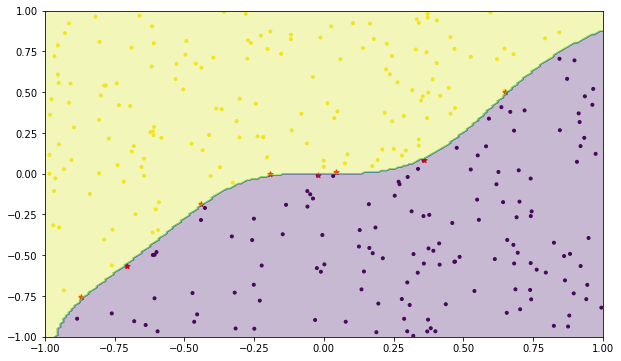

In [171]:

# random dataset
X = np.random.uniform(-1, 1, size=(300, 2))
y = f(X)

m = MySVM(kernel='rbf', gamma=1.5).fit(X, y)
y_pred = m.predict(X)

X1, X2 = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
Z = m.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
#Z = f(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='.')
sv = m.support_vecs_
plt.scatter(sv[:, 0], sv[:, 1], c='r', marker='*', s=30)
plt.contourf(X1, X2, Z, alpha=.3)

In [197]:
gamma = 1.5
n_trial = 1000
not_separable_count = 0

X_out = np.random.uniform(-1, 1, size=(500, 2))
y_out = f(X_out)

E_out = {9:[], 12:[]}
E_in = {9:[], 12:[]}

data_result = {
    'Ein[12]': [],
    'Eout[12]': [],
    'Ein[9]': [],
    'Eout[9]': []
}

for n in range(n_trial):
    
    # generate dataset
    X_in = np.random.uniform(-1, 1, size=(N, 2))
    y_in = f(X_in)
    
    rbf_9 = RBF_Model(k=9, gamma=1.5).fit(X_in, y_in)
    rbf_12 = RBF_Model(k=12, gamma=1.5).fit(X_in, y_in)
    
    y_in_9_pred = rbf_9.predict(X_in)
    y_out_9_pred = rbf_9.predict(X_out)
    y_in_12_pred = rbf_12.predict(X_in)
    y_out_12_pred = rbf_12.predict(X_out)
    
    data_result['Ein[12]'].append(error_rate(y_in, y_in_12_pred))
    data_result['Eout[12]'].append(error_rate(y_out, y_out_12_pred))
    data_result['Ein[9]'].append(error_rate(y_in, y_in_9_pred))
    data_result['Eout[9]'].append(error_rate(y_out, y_out_9_pred))

In [198]:
df = pd.DataFrame(data_result)
df.head()

,Ein[12],Ein[9],Eout[12],Eout[9]
0,0.03,0.06,0.030,0.056
1,0.03,0.06,0.034,0.062
2,0.02,0.05,0.016,0.036
3,0.04,0.06,0.034,0.058
4,0.02,0.02,0.060,0.054


In [199]:
E_in_down = df['Ein[12]'] < df['Ein[9]']
E_in_up = df['Ein[12]'] > df['Ein[9]']
E_out_down = df['Eout[12]'] < df['Eout[9]']
E_out_up = df['Eout[12]'] > df['Eout[9]']

In [200]:
a = (E_in_down & E_out_up).mean() * 100
b = (E_in_up & E_out_down).mean() * 100
c = (E_in_up & E_out_up).mean() * 100
d = (E_in_down & E_out_down).mean() * 100
e = (~(E_in_down | E_in_up) & ~(E_out_down | E_out_up)).mean() * 100
print("a : {:.4f}%\nb: {:.4f}%\nc: {:.4f}%\nd : {:.4f}%\ne : {:.4f}%".format(a, b, c, d, e))

a : 16.6000%
b: 4.0000%
c: 5.0000%
d : 47.6000%
e : 2.1000%


In [206]:
K = 9
gamma = 1.5, 2

data_result = {
    'Ein[1.5]': [],
    'Eout[1.5]': [],
    'Ein[2]': [],
    'Eout[2]': []
}

X_out = np.random.uniform(-1, 1, size=(500, 2))
y_out = f(X_out)

for _ in range(500):
    
    # generate dataset
    X_in = np.random.uniform(-1, 1, size=(N, 2))
    y_in = f(X_in)
    
    rbf_20 = RBF_Model(k=9, gamma=2.0).fit(X_in, y_in)
    rbf_15 = RBF_Model(k=9, gamma=1.5).fit(X_in, y_in)
    
    y_in_15_pred = rbf_15.predict(X_in)
    y_out_15_pred = rbf_15.predict(X_out)
    y_in_20_pred = rbf_20.predict(X_in)
    y_out_20_pred = rbf_20.predict(X_out)
    
    data_result['Ein[1.5]'].append(error_rate(y_in, y_in_15_pred))
    data_result['Eout[1.5]'].append(error_rate(y_out, y_out_15_pred))
    data_result['Ein[2]'].append(error_rate(y_in, y_in_20_pred))
    data_result['Eout[2]'].append(error_rate(y_out, y_out_20_pred))

In [207]:
df = pd.DataFrame(data_result)
df.head()

,Ein[1.5],Ein[2],Eout[1.5],Eout[2]
0,0.04,0.06,0.086,0.100
1,0.03,0.02,0.066,0.058
2,0.03,0.02,0.066,0.078
3,0.03,0.03,0.048,0.054
4,0.06,0.04,0.054,0.050


In [208]:
E_in_up = df['Ein[2]'] > df['Ein[1.5]']
E_in_down = df['Ein[2]'] < df['Ein[1.5]']
E_out_up = df['Eout[2]'] > df['Eout[1.5]']
E_out_down = df['Eout[2]'] < df['Eout[1.5]']

In [209]:
a = (E_in_down & E_out_up).mean() * 100
b = (E_in_up & E_out_down).mean() * 100
c = (E_in_up & E_out_up).mean() * 100
d = (E_in_down & E_out_down).mean() * 100
e = (~(E_in_down | E_in_up) & ~(E_out_down | E_out_up)).mean() * 100
print("a : {:.4f}%\nb: {:.4f}%\nc: {:.4f}%\nd : {:.4f}%\ne : {:.4f}%".format(a, b, c, d, e))

a : 6.4000%
b: 7.8000%
c: 37.2000%
d : 11.0000%
e : 5.0000%


In [185]:
K = 9
gamma = 1.5
N = 100

data_result = {
    'Ein[rbf]': [],
    'Eout[rbf]': [],
    'Ein[svm]': [],
    'Eout[svm]': []
}

X_out = np.random.uniform(-1, 1, size=(500, 2))
y_out = f(X_out)

trials = 300
for _ in range(trials):
    
    # generate data
    X_in = np.random.uniform(-1, 1, size=(N, 2))
    y_in = f(X_in)
    
    rbf = RBF_Model(k=K, gamma=gamma).fit(X_in, y_in)
    svm = MySVM(kernel='rbf', gamma=gamma).fit(X_in, y_in)
    
    y_in_pred_rbf = rbf.predict(X_in)
    y_out_pred_rbf = rbf.predict(X_out)
    y_in_pred_svm = svm.predict(X_in)
    y_out_pred_svm = svm.predict(X_out)
    
    data_result['Ein[rbf]'].append(error_rate(y_in, y_in_pred_rbf))
    data_result['Eout[rbf]'].append(error_rate(y_out, y_out_pred_rbf))
    data_result['Ein[svm]'].append(error_rate(y_in, y_in_pred_svm))
    data_result['Eout[svm]'].append(error_rate(y_out, y_out_pred_svm))

In [186]:
df = pd.DataFrame(data_result)

In [184]:
# K=12
E_out_svm_better = (df['Eout[svm]'] < df['Eout[rbf]']).mean()
E_out_svm_better

0.77000000000000002

In [187]:
# K=9
E_out_svm_better = (df['Eout[svm]'] < df['Eout[rbf]']).mean()
E_out_svm_better

0.8666666666666667

In [212]:
E_in_zero = 0
trials = 600
for _ in range(trials):
    
    X_in = np.random.uniform(-1, 1, size=(N, 2))
    y_in = f(X_in)
    
    rbf = RBF_Model(k=9, gamma=1.5).fit(X_in, y_in)
    y_in_pred = rbf.predict(X_in)
    
    if error_rate(y_in, y_in_pred) == 0:
        E_in_zero += 1
        
print(E_in_zero*100/trials)

2.3333333333333335
